### Auxiliary code to generate figures for manuscript. 

A lot of the inputs are generated from `workflows/summary_stats.snake`. Some of the code below is still hardcoded instead of drawing from the output of that pipeline directly. *Updating this is still in progress*

In [8]:
#Assume working directory is same as this file
library(ggplot2)
library(magrittr)
library(dplyr)
theme_set(theme_bw(20))

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## DFE 

[1] 1.00000000 0.19000000 0.07368421
[1] 2.000000 0.228410 3.864851
[1] 3.0000000 0.1711382 0.5888682
[1]  4.000000000 33.451956667  0.002029597
[1]   5.0000000   0.1407725 625.1449419


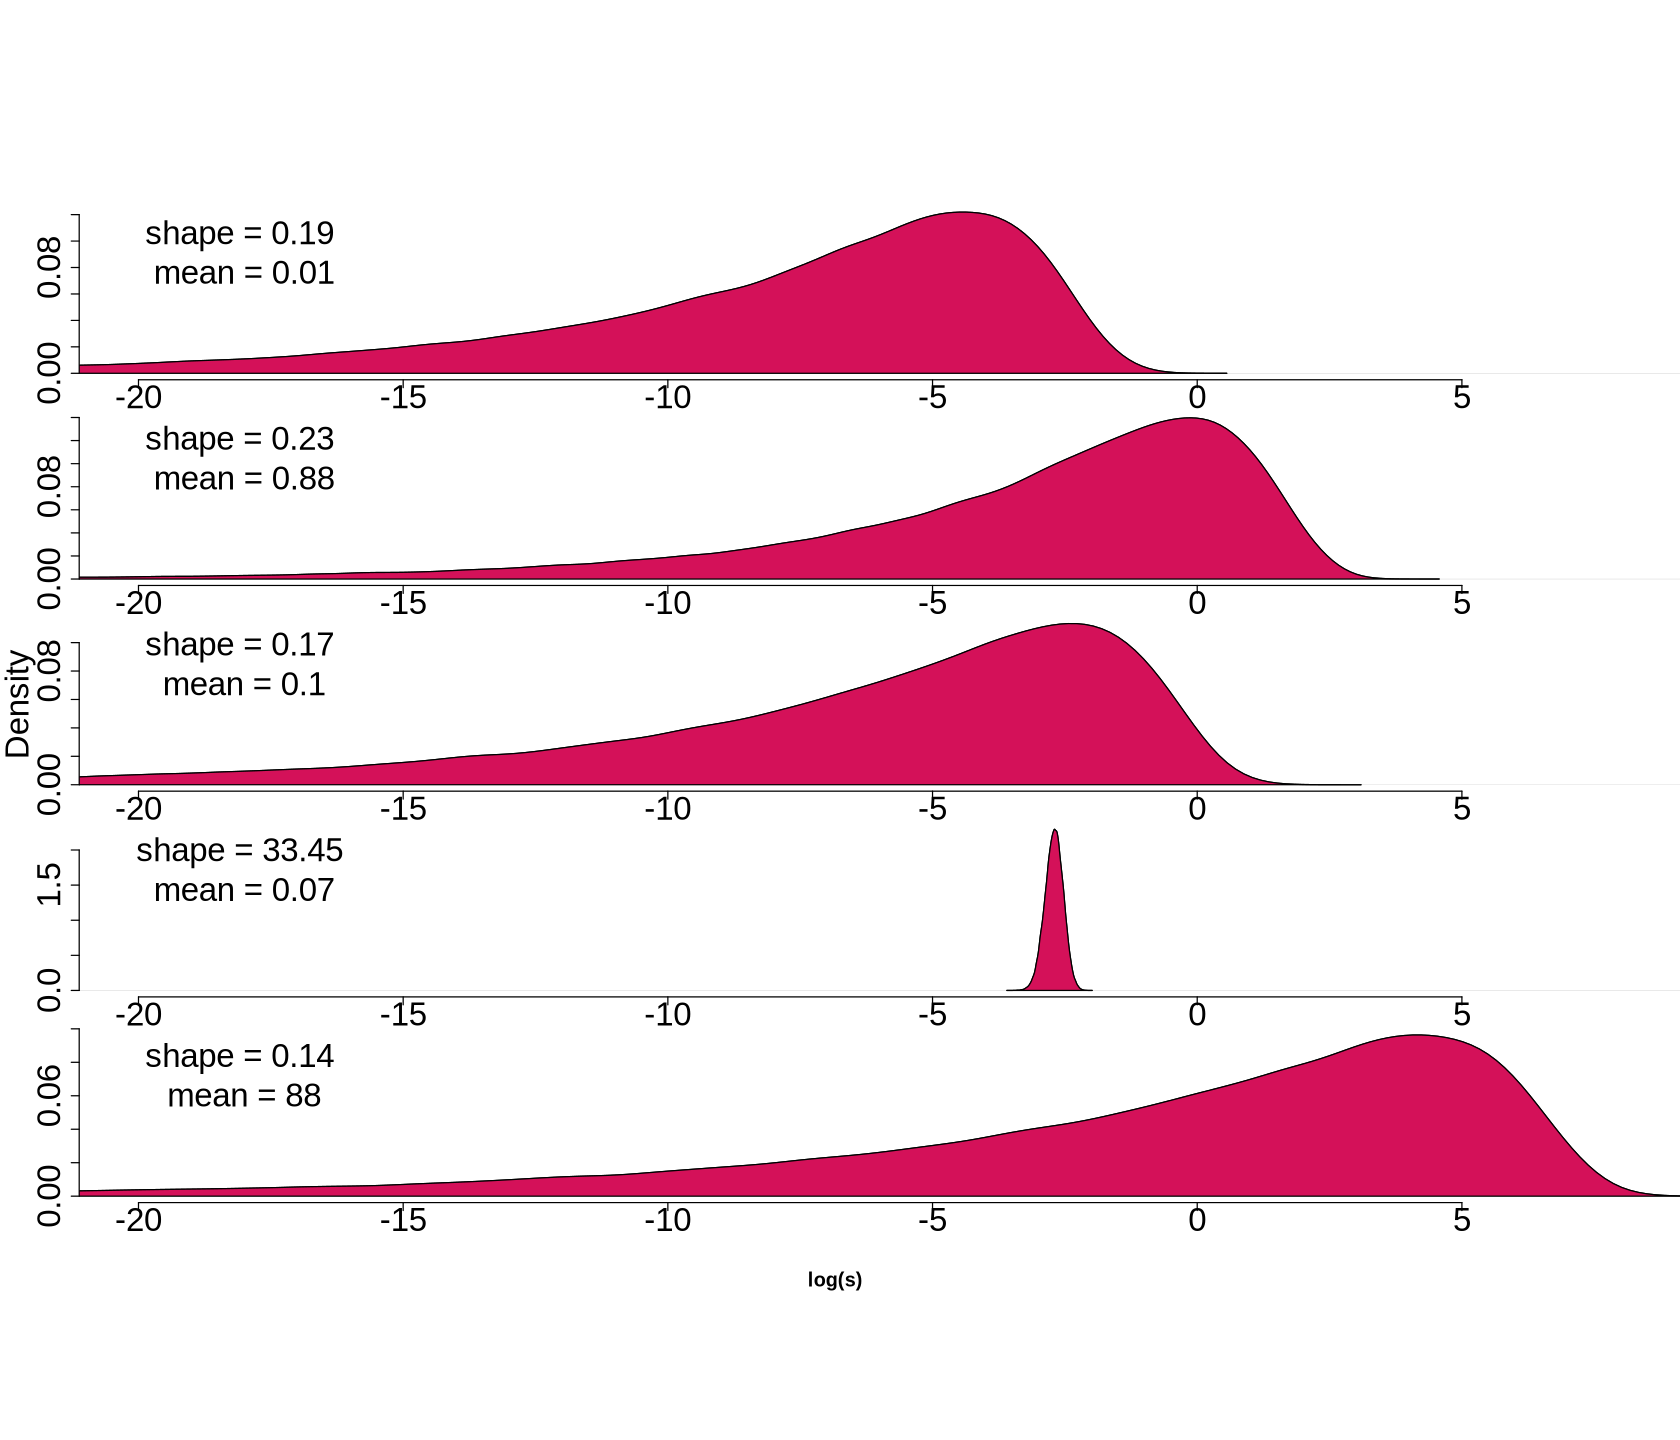

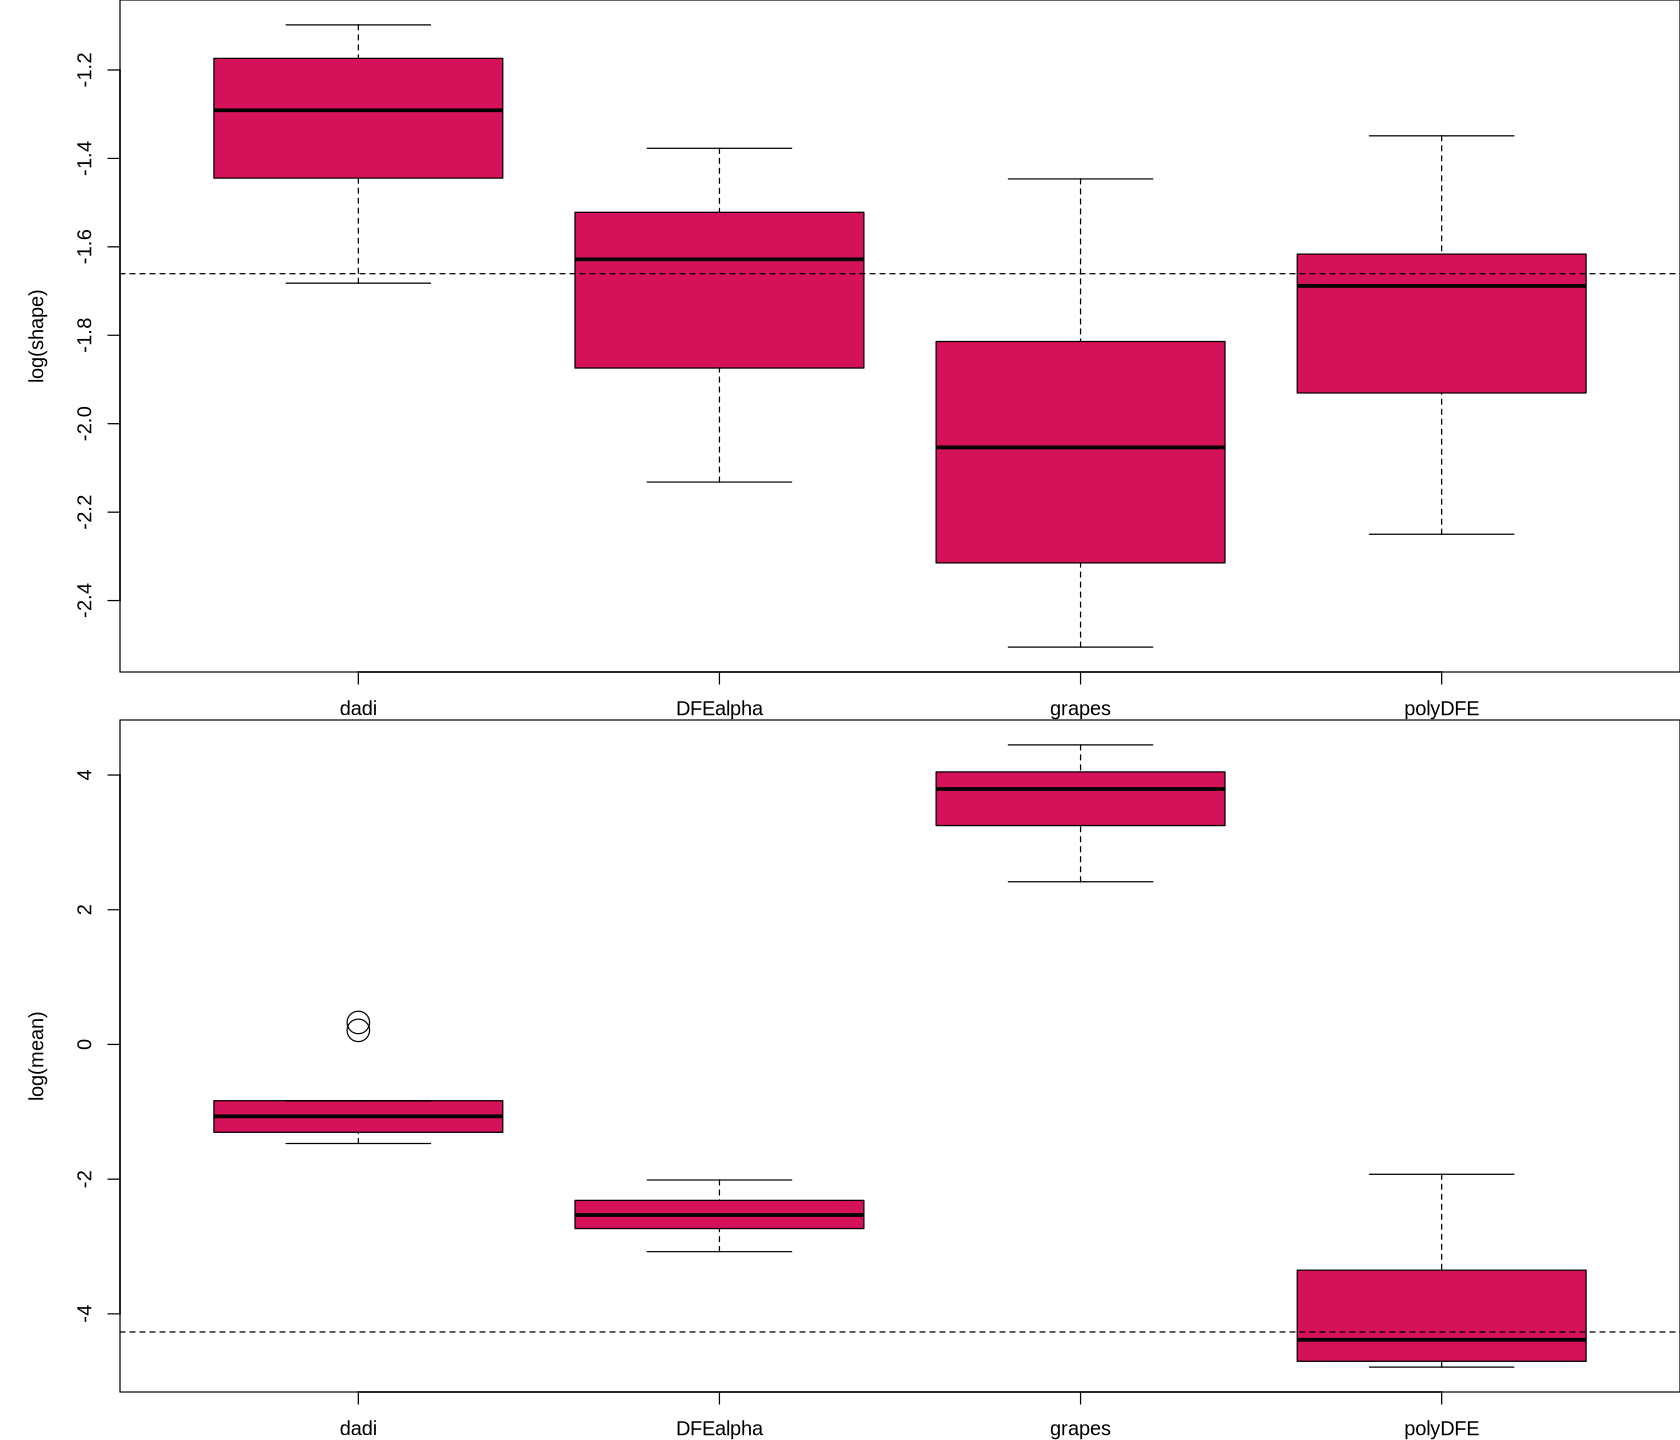

In [2]:
# # values inferred by analysis2 DFE pipeline. chr21
# # specifically, I printed these from within the plotting function, plots.py, plot_all_dfe_results(). Don't know which population.

options(repr.plot.width=14, repr.plot.height=12)
shapes=c(0.2284099572111781, 0.17113819923133333, 33.45195666666667, 0.14077251333333332)
means=c(0.8827704776174857, 0.10077784723057165, 0.06789399999999998, 88.00322466666667)

### Huber DFE
gamma_shape = 0.19  
gamma_mean = 0.014
shapes=c(gamma_shape, shapes)
means =c(gamma_mean, means)

# get scale
scales=means / shapes

par(mfrow=c(7,1))
par(mar=c(0,0,0,0))
plot.new()
xlims=c(-20,8)
ylabs = c("","","Density","","")
cexlab = 2.5
col_neu <- rgb(26, 133, 255, max = 255)
col_nonneu <- rgb(212, 17, 89, max = 255)
for (i in 1:length(shapes)){
	print(c(i, shapes[i], scales[i]))
	par(mar=c(2,5,0,0))
	d = rgamma(100000, shape=shapes[i], scale = scales[i])	
   d <- density(log(d))
   plot(d, main = "", xlim = xlims, axes=FALSE,  xlab = "", ylab = ylabs[i], cex.lab=cexlab) 
   polygon(d, col= col_nonneu)
   axis(1,cex.axis =cexlab)
   axis(2,cex.axis =cexlab)
   text(xlims[1]*0.9, max(d$y)*0.75, paste("shape =", round(shapes[i],2), "\nmean =", round(means[i],2)), cex=cexlab)
}
plot.new()
text(0.47,0.75, substitute(paste(bold("log(s)"))), cex = 1.5)



dadi_shapes = c(
  0.185960,
 0.278135,
 0.247640,
 0.309219,
 0.235831,
 0.318583,
 0.333512,
 0.271898,
 0.278065,
 0.193986
)

dadi_means = c(
  1.232836,
 0.322833,
 0.353515,
 0.350043,
 0.433924,
 0.252071,
 0.271398,
 0.229850,
 0.337739,
 1.386270
 )

polydfe_shapes = c(
 -2.249983,
-1.772841,
-1.976991,
-1.381346,
-1.930561,
-1.622925,
-1.348924,
-1.662915,
-1.616364,
-1.713962
)

polydfe_means = c(
 -1.927725,
-4.020522,
-3.298991,
-4.704150,
-3.350531,
-4.405715,
-4.790455,
-4.783470,
-4.617426,
-4.364794
)

dfealpha_shapes = c(
-2.131999,
-1.528319,
-1.498791,
-1.521885,
-1.874055,
-1.644029,
-1.377136,
-1.923464,
-1.823250,
-1.612442
)

dfealpha_means = c(
-2.012456,
-2.726897,
-3.014385,
-2.182352,
-2.314556,
-2.535552,
-2.528482,
-3.076465,
-2.733306,
-2.520940
)

grapes_shapes = c(
-2.038599,
-2.068581,
-1.665252,
-2.314793,
-2.012733,
-1.446444,
-1.814036,
-2.505231,
-2.082582,
-2.455523
)

grapes_means = c(
 2.648336,
4.141880,
3.648487,
4.447482,
3.249948,
3.958773,
4.046236,
3.399890,
2.415414,
3.935956
)


col_neu <- rgb(26, 133, 255, max = 255)
col_nonneu <- rgb(212, 17, 89, max = 255)

par(mfrow = c(2,1))
method = c(rep("dadi",10), rep("polyDFE",10), rep("DFEalpha",10), rep("grapes",10))
shapes = c(log(dadi_shapes), polydfe_shapes, dfealpha_shapes, grapes_shapes)
means = c(log(dadi_means), polydfe_means, dfealpha_means, grapes_means)

boxplot(shapes~method, ylab = "log(shape)", col = col_nonneu, xlab="", cex=cexlab)
abline(h=log(0.19), lty = 2)

boxplot(means~method, ylab = "log(mean)", col = col_nonneu, xlab = "", cex=cexlab)
abline(h=log(0.014), lty = 2)


#commands to make get exonic overlaps 

#copy exonic regions
cache_location=`python -c "import stdpopsim; import appdirs; print(appdirs.user_cache_dir('stdpopsim'))"`
path_to_exons="${cache_location}/annotations/HomSap/ensembl_havana_104_exons/ensembl_havana_exons_3.txt"
cp $path_to_exons exons_ch3.txt

#get overlap between stats windows and exons
bedtools intersect -wao -b <(awk '{print 1 "\t" $1-1 "\t" $2}' exons_ch3.txt) -a <(tail -n+2 ../results/summaries/OutOfAfrica_3G09/Gamma_H17/ensembl_havana_104_exons/sim_chr3.allseeds.CHB.diploshic.stats) > T

#add header plus extra fields from bedtools intersection, including overlapping bps
cat <(head -n1 ../results/summaries/OutOfAfrica_3G09/Gamma_H17/ensembl_havana_104_exons/sim_chr3.allseeds.CHB.diploshic.stats | awk '{print $0 "\texon_chr\texon_start\texon_end\toverlap"}') T > sim_chr3.CHB.diploshic.stats_overlaps

,chrom,start,end,pi,thetaW,tajD,thetaH,fayWuH,maxFDA,HapCount,⋯,Omega,distVar,distSkew,distKurt,mid,seed,exon_chr,exon_start,exon_end,overlap
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>
1,1,1,100000,3.325786e-05,3.766089e-05,-0.37602935,8.329226e-05,5.003440e-05,0.975,14,⋯,4.115625,4.802571e-10,-0.10656835,-1.2064644,50000.5,0,.,-1,-1,0
2,1,100001,200000,1.521906e-04,1.462273e-04,0.14678915,1.950710e-04,4.288038e-05,0.975,24,⋯,5.502807,5.960732e-09,-0.40122362,-0.7889759,150000.5,0,1,196761,197063,302
3,1,200001,300000,9.337155e-05,8.964477e-05,0.14565460,1.649504e-04,7.157885e-05,0.950,23,⋯,4.663680,4.380626e-09,-0.01572864,-1.7651818,250000.5,0,1,244611,244692,81
4,1,300001,400000,8.841023e-05,8.962319e-05,-0.04741755,2.264403e-04,1.380301e-04,0.975,26,⋯,2.604031,2.462498e-09,0.26110654,-0.6496844,350000.5,0,1,319681,319867,186
5,1,300001,400000,8.841023e-05,8.962319e-05,-0.04741755,2.264403e-04,1.380301e-04,0.975,26,⋯,2.604031,2.462498e-09,0.26110654,-0.6496844,350000.5,0,1,325957,326064,107
6,1,300001,400000,8.841023e-05,8.962319e-05,-0.04741755,2.264403e-04,1.380301e-04,0.975,26,⋯,2.604031,2.462498e-09,0.26110654,-0.6496844,350000.5,0,1,328165,328354,189


`summarise()` has grouped output by 'chrom', 'start'. You can override using
the `.groups` argument.
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(stats$overlap, stats$pi, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  stats$overlap and stats$pi
S = 1521342120, p-value = 3.141e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1759333 


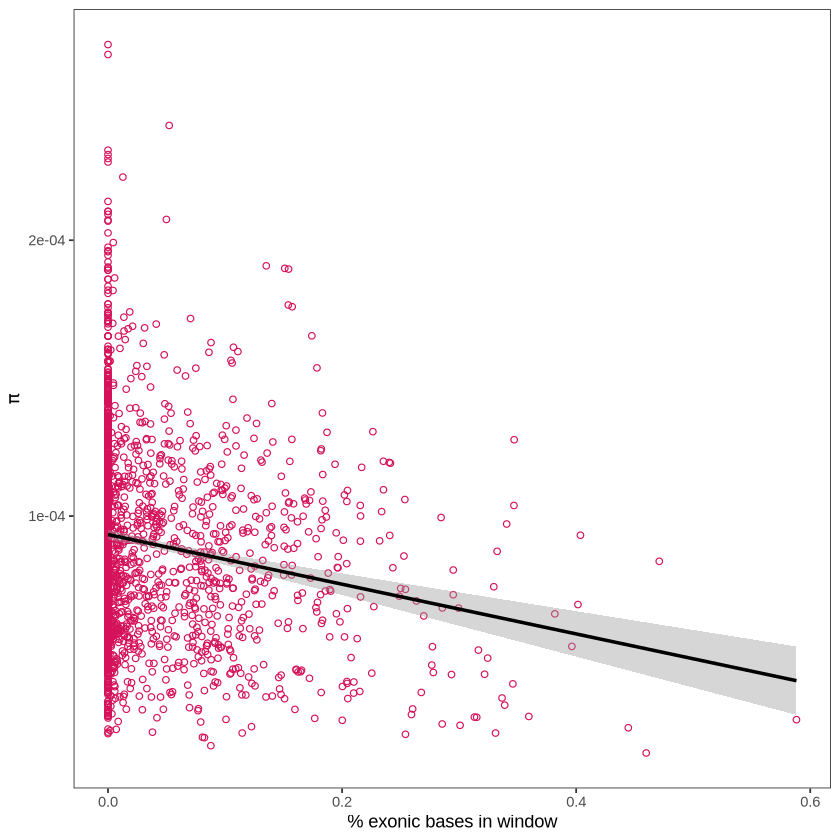

In [10]:
stats = read.table("sim_chr3.CHB.diploshic.stats_overlaps", header = T)
head(stats)

stats %>% group_by(chrom, start, end) %>% 
  summarise(pi = mean(pi), overlap = sum(overlap)) -> stats

# plot
col_neu <- rgb(26, 133, 255, max = 255)
col_nonneu <- rgb(212, 17, 89, max = 255)

ggplot(stats, aes(x = overlap / (end-start), y = pi)) +
  geom_point(color=col_nonneu, pch=1) +
  stat_smooth(method="lm",  color="black") +
  theme_bw() +
  labs(x = "% exonic bases in window",  y = expression(pi)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) 
  
cor.test(stats$overlap, stats$pi, method= "spearman")


Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,chrom,start,end,pi,thetaW,tajD,thetaH,fayWuH,maxFDA,HapCount,H1,H12,H2.H1,ZnS,Omega,distVar,distSkew,distKurt,mid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,250001,350000,0.0001630960,0.0001456184,0.3076367,0.0002723362,0.0001092402,0.975,27.83333,0.06791667,0.10750,0.6385500,0.12319649,7.466366,1.087215e-08,-0.03592254,-0.9098309,300000.5
2,1,800001,900000,0.0002621238,0.0002098659,0.8813727,0.0003854690,0.0001233452,0.975,31.00000,0.04475000,0.06100,0.7717137,0.15100583,3.500149,2.215315e-08,-0.33834793,-0.9529396,850000.5
3,1,1300001,1400000,0.0001573167,0.0001762098,-0.3695645,0.0002924706,0.0001351540,0.975,33.60000,0.03600000,0.04550,0.7948505,0.08191371,3.020519,5.502954e-09,0.08810498,0.1494689,1350000.5
4,1,1800001,1900000,0.0001864147,0.0001611688,0.5755053,0.0003411317,0.0001547170,0.975,29.00000,0.05175000,0.07550,0.6947214,0.12410162,3.695009,9.007393e-09,-0.33438755,-0.6041109,1850000.5
5,1,2300001,2400000,0.0001767787,0.0001478359,0.7831177,0.0003118868,0.0001351081,0.975,30.20000,0.05475000,0.08025,0.6144870,0.15496832,5.224043,1.186052e-08,-0.16044928,-1.0492308,2350000.5
6,1,2800001,2900000,0.0002054761,0.0001786016,0.5329357,0.0003991898,0.0001937137,0.975,36.60000,0.03175000,0.03950,0.8138256,0.09382440,5.006076,9.587494e-09,-0.07619027,-0.6744498,2850000.5


[1] 250001

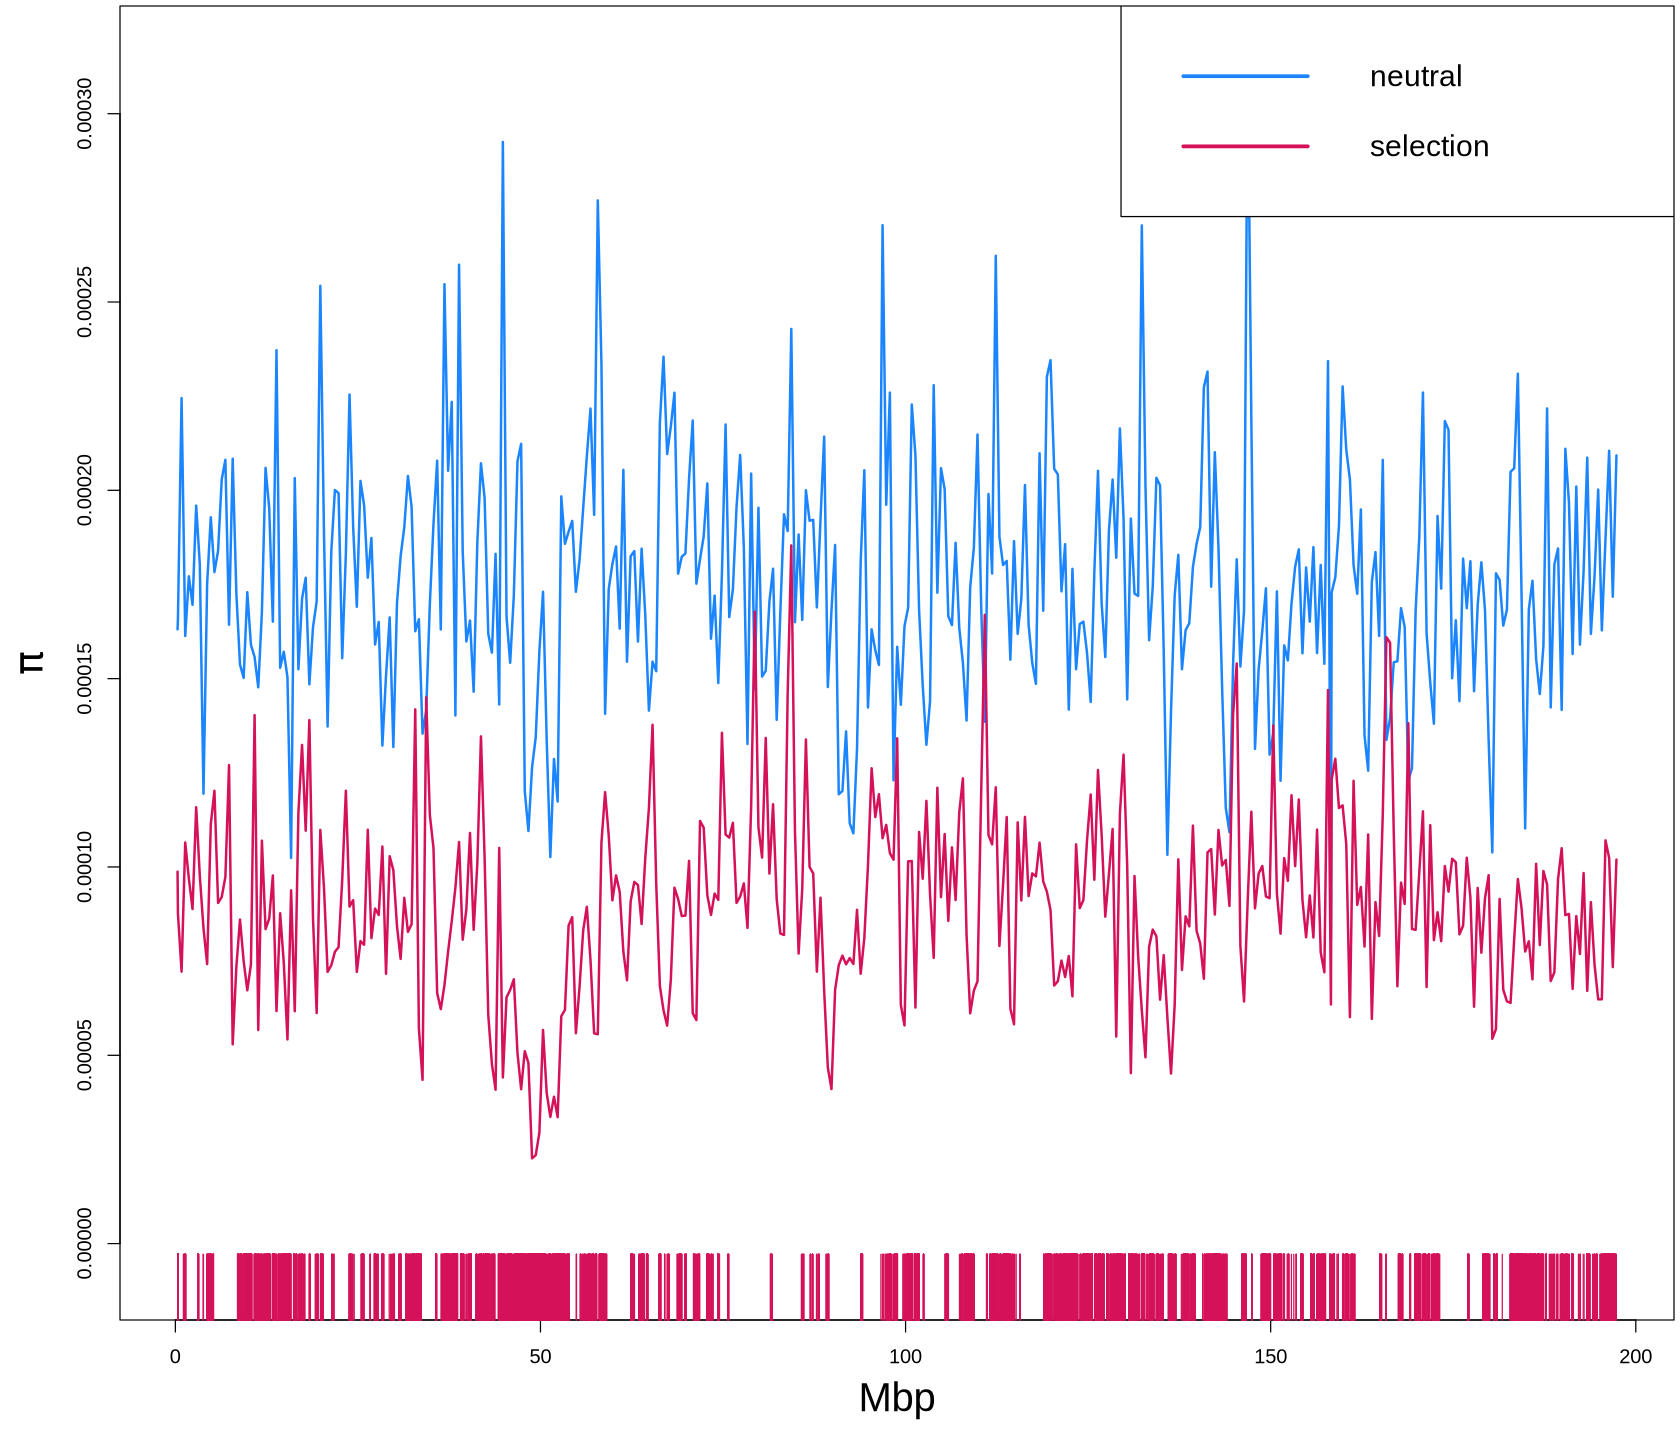

In [4]:

#these output paths are not currently in the tiny config output.

system("python bin_regions.py ../results/summaries/OutOfAfrica_3G09/none/none/sim_chr3.allseeds.CHB.diploshic.stats > neu.diploshic.stats_2binsAveraged")
system("python bin_regions.py ../results/summaries/OutOfAfrica_3G09/Gamma_H17/ensembl_havana_104_exons/sim_chr3.allseeds.CHB.diploshic.stats > nonneu.diploshic.stats_2binsAveraged")

library(dplyr) 

a = read.table("neu.diploshic.stats_2binsAveraged", header = T)
head(a)
b = read.table("nonneu.diploshic.stats_2binsAveraged", header = T)
min(b$start)


a$pos = (a$start + (a$end-a$start)/2) / 1e6
b$pos = (b$start + (b$end-b$start)/2) / 1e6

exons = read.table("exons_ch3.txt") # this was printed directly from the snakefilem, L239. Two columns with start end positions.             exon_intervals = exons.get_chromosome_annotations(wildcards.chrms)

exons = exons / 1e6
exons = exons[,1] + (exons[,2]-exons[,1])/2 # it doesn't take a rnage, just position

### plot ###

df = a %>%
  group_by(pos) %>%
  summarise_at(vars(pi), list(name = mean))
a2 = data.frame(df)

df = b %>%
  group_by(pos) %>%
  summarise_at(vars(pi), list(name = mean))
b2 = data.frame(df)

c2 = rbind(a2,b2)
exons = exons[exons >= min(c2[,1]) & exons <= max(c2[,1])]


col_neu <- rgb(26, 133, 255, max = 255)
col_nonneu <- rgb(212, 17, 89, max = 255)

par(mar=c(5,5,0.25,0.25))
plot(c2[,2] ~ c2[,1], col = "white", xlab = "Mbp", ylab = expression(pi), cex.lab = 2, ylim = c(min(c2[,2])-0.000030, max(c2[,2])))
lines(a2[,1], a2[,2], col= col_neu, lwd=2)
lines(b2[,1], b2[,2], col= col_nonneu, lwd=2)
legend("topright", legend=c("neutral", "selection"), lty = 1, lwd =3, col = c(col_neu, col_nonneu), cex=1.5)
rug(exons, ticksize = 0.05, side = 1, lwd = 1, col = col_nonneu)





#commands to make get recombination rates

#copy exonic regions
cache_location=`python -c "import stdpopsim; import appdirs; print(appdirs.user_cache_dir('stdpopsim'))"`
path_to_map="${cache_location}/genetic_maps/HomSap/HapMapII_GRCh37/genetic_map_GRCh37_chr3.txt"
cat $path_to_map | sed 's/chr3/1/g' | awk 'NR > 1 {print $1 "\t" $2-1 "\t" $2 "\t" $3}' > genetic_map_chr3.txt

#get overlap between stats windows and exons
bedtools intersect -wao -b genetic_map_chr3.txt -a <(tail -n+2 ../results/summaries/OutOfAfrica_3G09/Gamma_H17/ensembl_havana_104_exons/sim_chr3.allseeds.CHB.diploshic.stats) > T

#add header plus extra fields from bedtools intersection, including overlapping bps
cat <(head -n1 ../results/summaries/OutOfAfrica_3G09/Gamma_H17/ensembl_havana_104_exons/sim_chr3.allseeds.CHB.diploshic.stats | awk '{print $0 "\texon_chr\texon_start\texon_end\trate\toverlap"}') T > sim_chr3.CHB.diploshic.stats_rates

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,chrom,start,end,pi,thetaW,tajD,thetaH,fayWuH,maxFDA,HapCount,⋯,distVar,distSkew,distKurt,mid,seed,exon_chr,exon_start,exon_end,rate,overlap
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<dbl>,<int>
1,1,1,100000,3.325786e-05,3.766089e-05,-0.3760294,8.329226e-05,5.00344e-05,0.975,14,⋯,4.802571e-10,-0.1065684,-1.206464,50000.5,0,1,61112,61113,2.699484,1
2,1,1,100000,3.325786e-05,3.766089e-05,-0.3760294,8.329226e-05,5.00344e-05,0.975,14,⋯,4.802571e-10,-0.1065684,-1.206464,50000.5,0,1,61494,61495,0.980191,1
3,1,1,100000,3.325786e-05,3.766089e-05,-0.3760294,8.329226e-05,5.00344e-05,0.975,14,⋯,4.802571e-10,-0.1065684,-1.206464,50000.5,0,1,62225,62226,0.854964,1
4,1,1,100000,3.325786e-05,3.766089e-05,-0.3760294,8.329226e-05,5.00344e-05,0.975,14,⋯,4.802571e-10,-0.1065684,-1.206464,50000.5,0,1,62308,62309,0.766304,1
5,1,1,100000,3.325786e-05,3.766089e-05,-0.3760294,8.329226e-05,5.00344e-05,0.975,14,⋯,4.802571e-10,-0.1065684,-1.206464,50000.5,0,1,62613,62614,0.591360,1
6,1,1,100000,3.325786e-05,3.766089e-05,-0.3760294,8.329226e-05,5.00344e-05,0.975,14,⋯,4.802571e-10,-0.1065684,-1.206464,50000.5,0,1,62745,62746,0.462049,1


`summarise()` has grouped output by 'chrom', 'start'. You can override using
the `.groups` argument.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 32 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 32 rows containing missing values or values outside the scale range
(`geom_point()`).”



	Spearman's rank correlation rho

data:  stats$rate and stats$pi
S = 1092702008, p-value = 5.627e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1130763 


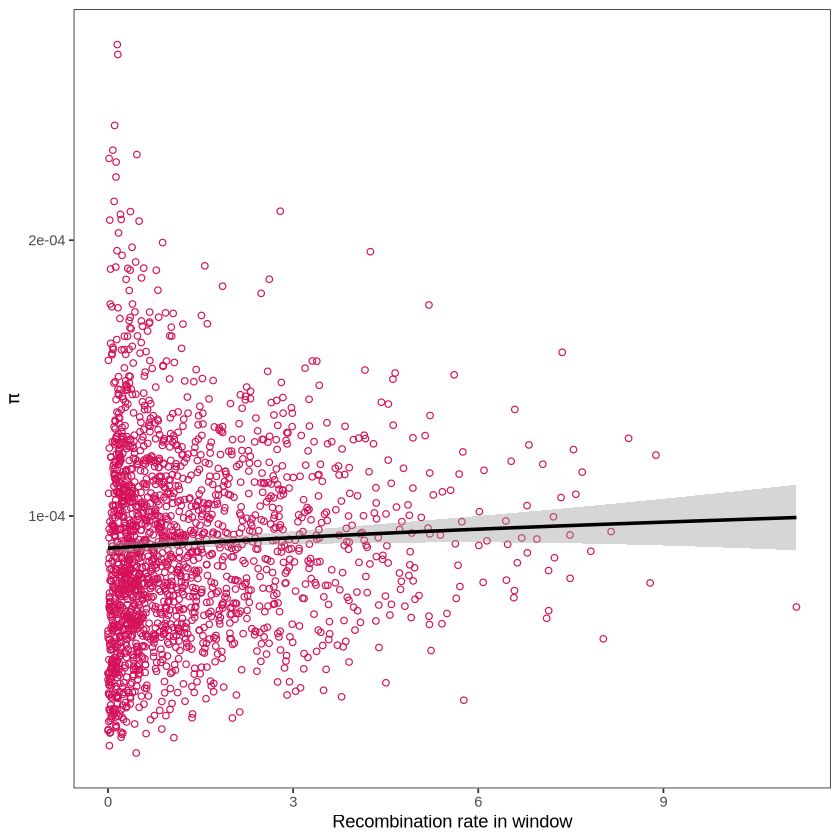

In [11]:

stats <- read.table("sim_chr3.CHB.diploshic.stats_rates", header = T)
stats$rate = as.numeric(stats$rate)
head(stats)

stats %>% group_by(chrom, start, end) %>% 
  summarise(pi = mean(pi), rate = mean(rate)) -> stats

# plot
col_neu <- rgb(26, 133, 255, max = 255)
col_nonneu <- rgb(212, 17, 89, max = 255)

library(ggplot2)
ggplot(stats, aes(x = rate, y = pi)) +
  geom_point(color=col_nonneu, pch=1) +
  stat_smooth(color="black") +
  theme_bw() +
  labs(x = "Recombination rate in window",  y = expression(pi)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) 

cor.test(stats$rate, stats$pi, method= "spearman")



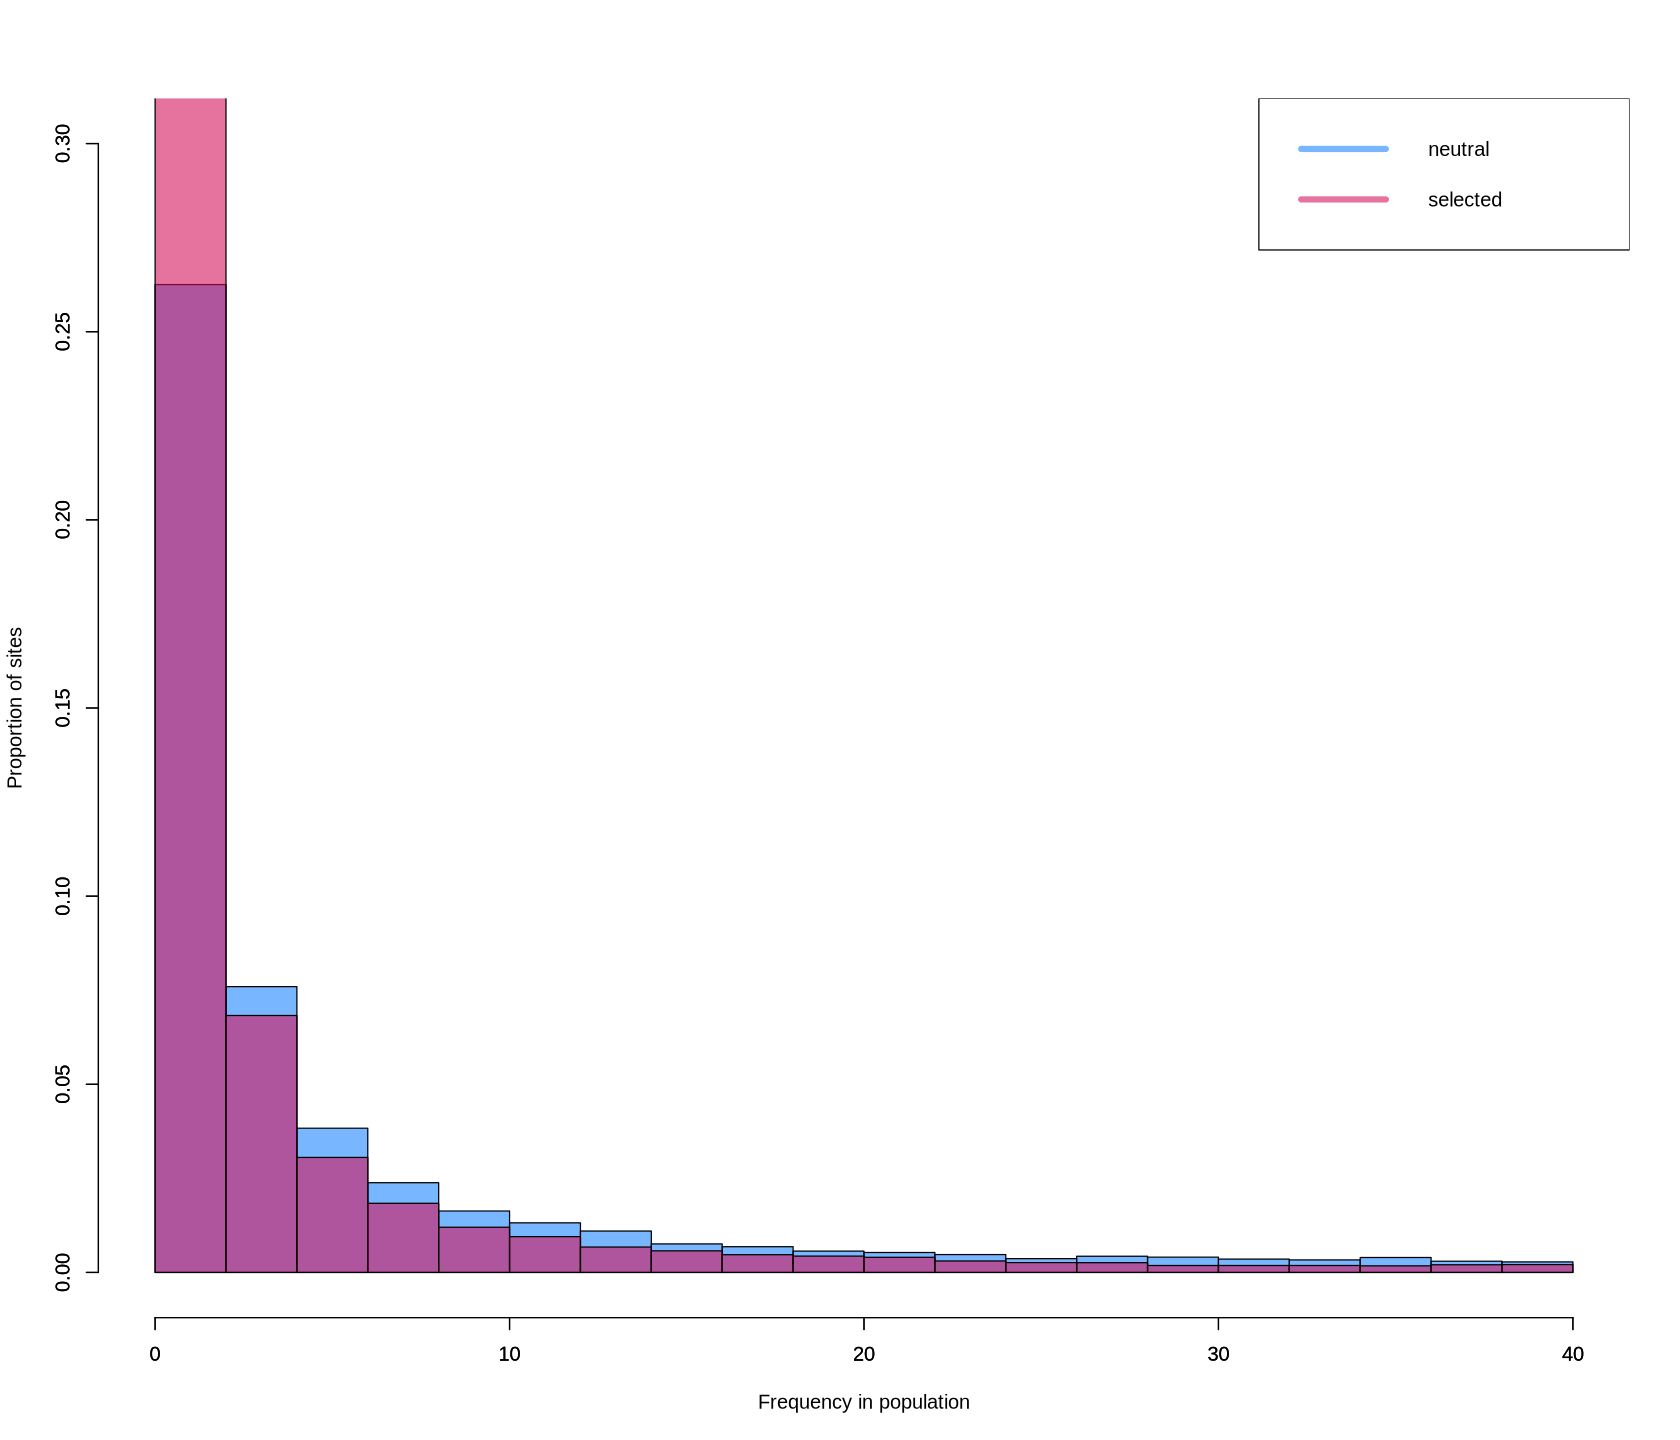

In [ ]:

# [chriscs@talapas-ln1 analysis2]$ cat results/inference/OutOfAfrica_3G09/dadi/Gamma_H17/ensembl_havana_104_exons/*/chr13/pop0/pop0.dadi.neu.fs | grep -v unfolded | grep -v "1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1" > neu.sf
system("cat ../results/inference/OutOfAfrica_3G09/dadi/Gamma_H17/ensembl_havana_104_exons/*/pop0/pop0.dadi.neu.fs | grep -v unfolded | grep -v '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1' > neu.sf")
system("cat ../results/inference/OutOfAfrica_3G09/dadi/Gamma_H17/ensembl_havana_104_exons/*/pop0/pop0.dadi.nonneu.fs | grep -v unfolded | grep -v '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1' > nonneu.sf")

# read data
neu_ = read.table("neu.sf")
nonneu_ = read.table("nonneu.sf")

# exclude fixed variants
neu_ = neu_[-c(41)]
nonneu_ = nonneu_[-c(41)]

# average across reps
neu_ = colMeans(neu_)
nonneu_ = colMeans(nonneu_)

# build histogram
neu = rep(0,sum(neu_))
counter = 1
for (i in 1:length(neu_)){
	for (j in 1:(neu_[i]*10)){ # *10 to get integers
		neu[counter] = i
		counter = counter + 1
	}
}
nonneu = rep(0,sum(nonneu_))
counter = 1
for (i in 1:length(nonneu_)){
	for (j in 1:(nonneu_[i]*10)){
		nonneu[counter] = i
		counter = counter + 1
	}
}

# colors
col_neu <- rgb(26, 133, 255, max = 255, alpha = 150)
col_nonneu <- rgb(212, 17, 89, max = 255, alpha = 150)

#plot
hist(neu, breaks = 25, prob = TRUE, ylim=c(0,0.3), col = col_neu,
	 	  main = "",
          ylab = "Proportion of sites",
          xlab = "Frequency in population",
	 ) # Save first histogram data
par(new=TRUE)
hist(nonneu, breaks = 25, prob = TRUE, ylim=c(0,0.3), col = col_nonneu, xlab = "", main = "", ylab = "") # Save 2nd histogram data
legend("topright", legend = c("neutral", "selected"), lty = 1, lwd=5, col = c(col_neu, col_nonneu))
